<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

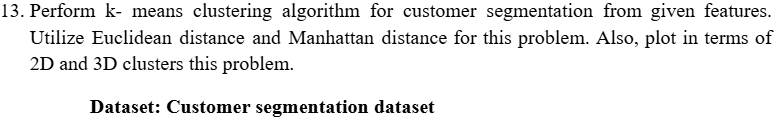

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv("Cust_Segmentation.csv")
print("First 5 rows:\n", data.head())
print("\nDataset Info:")
data.info()
data = data.select_dtypes(include=[np.number])
data.dropna(inplace=True)

First 5 rows:
    Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null  

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

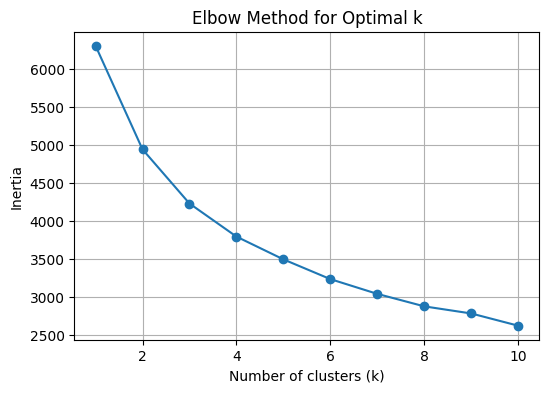

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
k = 4
kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(scaled_data)
data['Cluster_Euclidean'] = labels_euclidean
print("\nCluster Centers (Euclidean):\n", kmeans_euclidean.cluster_centers_)


Cluster Centers (Euclidean):
 [[-0.16830006  0.81891882 -0.22209576  1.04183977  0.55342202  0.12149316
   0.15366007 -0.54380897 -0.17266576]
 [ 0.11486073 -0.38585908 -0.06287627 -0.42863513 -0.42426476 -0.42071784
  -0.44461973 -0.59494973 -0.35953913]
 [-0.03518007 -0.42352966  0.17900181 -0.69301045 -0.39640484 -0.01155581
  -0.08133125  1.62462257  0.54838546]
 [-0.00627292  0.9280457   0.64287289  1.29751088  2.0958156   2.38150944
   2.65936482  0.42188099  1.15812361]]


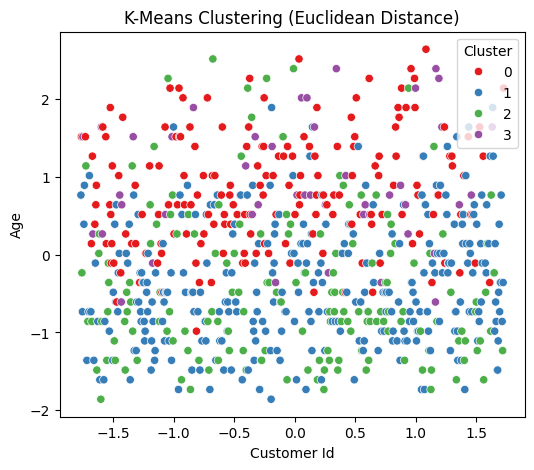

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=labels_euclidean,
    palette='Set1'
)
plt.title("K-Means Clustering (Euclidean Distance)")
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend(title="Cluster")
plt.show()

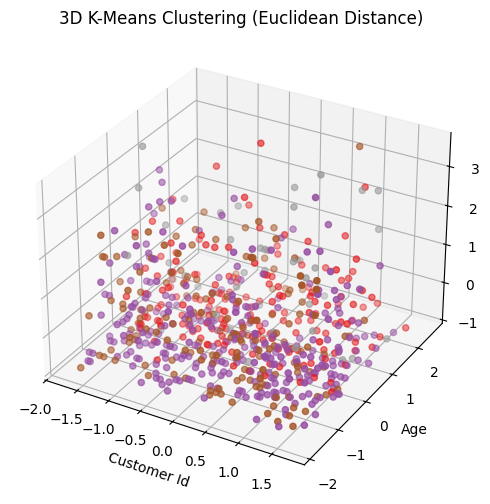

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    scaled_data[:, 2],
    c=labels_euclidean,
    cmap='Set1'
)
ax.set_title("3D K-Means Clustering (Euclidean Distance)")
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
plt.show()

In [ ]:
def manhattan_kmeans(X, k, max_iter=100):
    np.random.seed(42)
    centers = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iter):

        distances = cdist(X, centers, metric='cityblock')
        labels = np.argmin(distances, axis=1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    return labels, centers
labels_manhattan, centers_manhattan = manhattan_kmeans(scaled_data, k)
data['Cluster_Manhattan'] = labels_manhattan

print("\nCluster Centers (Manhattan):\n", centers_manhattan)



Cluster Centers (Manhattan):
 [[-0.16294393  0.98936874  0.09215342  1.33188841  1.19781811  0.55166229
   0.90683308 -0.48116153  0.13024758]
 [-0.05275883 -0.46005246  0.21586054 -0.70585676 -0.39546062  0.02673299
  -0.02813059  1.5057555   0.63128993]
 [ 0.2829063   1.04359215  0.62222808  1.18158664  2.30370646  4.03223626
   3.01193235  1.33944967  1.73612017]
 [ 0.05834115 -0.15817705 -0.15341024 -0.16411394 -0.31452547 -0.38711529
  -0.42021623 -0.57166826 -0.40163711]]


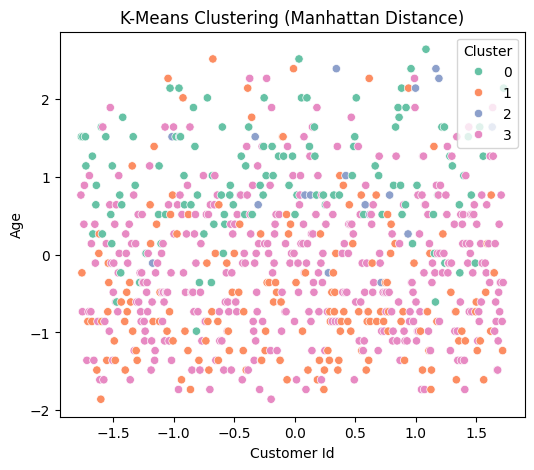

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=labels_manhattan,
    palette='Set2'
)
plt.title("K-Means Clustering (Manhattan Distance)")
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend(title="Cluster")
plt.show()

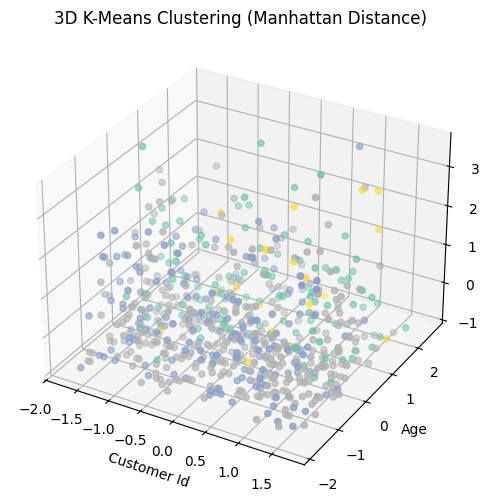

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    scaled_data[:, 2],
    c=labels_manhattan,
    cmap='Set2'
)
ax.set_title("3D K-Means Clustering (Manhattan Distance)")
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
plt.show()

In [ ]:
print("\nCluster distribution (Euclidean):")
print(data['Cluster_Euclidean'].value_counts())
print("\nCluster distribution (Manhattan):")
print(data['Cluster_Manhattan'].value_counts())


Cluster distribution (Euclidean):
Cluster_Euclidean
1    313
0    178
2    162
3     47
Name: count, dtype: int64

Cluster distribution (Manhattan):
Cluster_Manhattan
3    391
1    169
0    120
2     20
Name: count, dtype: int64
